<a href="https://colab.research.google.com/github/fendy07/customer-churn-ML/blob/main/Customer_Churn_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer Churn Using Machine Learning Algorithms**

## **Install Kaggle**

In [1]:
!pip -q install kaggle

In [2]:
# Buat direktori folder untuk kaggle
!mkdir ~/.kaggle

In [3]:
# Load file kaggle.json dalam Google Drive
!cp /content/drive/MyDrive/.kaggle/kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

## **Download Dataset Dari Kaggle**



In [5]:
# Download dataset dari kaggle dan simpan dalam folder google drive
!kaggle datasets download gauravtopre/bank-customer-churn-dataset -p /content/drive/MyDrive/Proyek/Data

Dataset URL: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset
License(s): other
  0% 0.00/187k [00:00<?, ?B/s]
100% 187k/187k [00:00<00:00, 23.4MB/s]


In [6]:
# Unzip file dataset berdasarkan path folder cloud drive
!unzip /content/drive/MyDrive/Proyek/Data/bank-customer-churn-dataset.zip -d /content/drive/MyDrive/Proyek/Data

Archive:  /content/drive/MyDrive/Proyek/Data/bank-customer-churn-dataset.zip
  inflating: /content/drive/MyDrive/Proyek/Data/Bank Customer Churn Prediction.csv  


## **Import Library**

In [56]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [10]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Proyek/Data/Bank Customer Churn Prediction.csv')
data.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [11]:
# Periksa 10 data baris terakhir
data.tail(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9990,15798964,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,15657105,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,15569266,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [12]:
# Periksa informasi pada dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [14]:
# Periksa bentuk dataset
data.shape

(10000, 12)

Dataset yang dimiliki ada 10000 baris dengan 12 kolom. Dengan penjelasan tiap kolom sebagai berikut:

*   `customer_id`     : ID pelanggan (Variabel data yang tidak digunakan).
*   `credit_score`    : Skor kredit pelanggan
*   `country`         : Negara domisili pelanggan
*   `gender`          : Jenis kelamin pelanggan
*   `age`             : Umur pelanggan
*   `tenure`          : Tenor yang dimiliki pelanggan
*   `balance`         : Saldo yang dimiliki pelanggan
*   `products_number` : Nomor produk yang digunakan pelanggan
*   `credit_card`     : Kartu kredit yang dimiliki
*   `active_member`   : Apakah kartu member pelanggan aktif?
*   `estimated_salary`: Estimasi gaji yang dimiliki pelanggan?
*   `churn`           : Apakah pelanggan akan Churn atau tidak? **Jika iya maka dengan nilai 1 dan jika tidak maka dengan nilai 0**

## **Exploratory Data Analysis**

In [15]:
# Periksa apakah data terdapat kekosongan?
data.isna().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [16]:
# Apakah data terdapat duplikasi?
data.duplicated().sum()

np.int64(0)

In [17]:
# Analisis statistik deskriptif
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [18]:
# Periksa apakah data terdapat nilai null?
data.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [20]:
# Hapus kolom data customer_id
data.drop(['customer_id'], axis = 1, inplace = True)
# Ambil sampel data sebanyak 20 baris
data.sample(20)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7685,705,Germany,Female,40,3,92889.91,1,1,1,109496.69,0
4163,627,France,Female,35,7,0.00,2,0,1,193022.44,0
5097,650,Spain,Male,20,8,0.00,2,1,1,113469.65,0
1507,549,Germany,Female,43,3,134985.66,1,1,0,6101.41,0
684,583,France,Male,24,9,135125.28,1,0,0,89801.90,0
8786,741,Germany,Female,19,8,108711.57,2,1,0,24857.25,0
7515,623,France,Female,35,0,130557.24,1,1,1,47880.71,0
8835,716,Spain,Male,34,9,0.00,1,1,1,66695.71,0
7525,580,Germany,Male,35,9,121355.19,1,0,1,35671.45,0
5141,774,Spain,Male,32,9,0.00,2,1,0,10604.48,0


### **Data Visualization**

In [22]:
# Lakukan groupby pada bagian kolom data churn untuk melihat hasil Churn
dataChurn = data.groupby('churn').count()
# Visualisasi data dengan plot Pie Chart
fig = px.pie(dataChurn, values = 'active_member', names = dataChurn.index, title = 'Persentase Pelanggan Aktif vs Churn')
fig.show()

Dalam visualisasi yang ditampilkan diatas menunjukkan bahwa di dalam dataset ada dua kelompok pelanggan yaitu **20.4% pelanggan yang sudah churn dan sisanya 79.6% adalah pelanggan yang masih aktif berdasarkan active member Bank tersebut**.

In [23]:
# Visualisasi distplot pada kolom credit score
fig = px.histogram(data, x = 'credit_score', color = 'churn', title = 'Skor Kredit Pelanggan')
fig.show()

In [24]:
# Periksa jumlah churn
data['churn'].value_counts()

,count
churn,
0,7963
1,2037


In [25]:
# Visualisasi histogram plot pada bagian kolom age dan balance untuk identifikasi churn
fig = px.histogram(data, x = 'age', y = 'balance', color = 'churn', title = 'Identifikasi Churn Pelanggan')
fig.show()

In [26]:
# Identifikasi jumlah pelanggan berdasarkan jenis kelamin
data['gender'].value_counts()

,count
gender,
Male,5457
Female,4543


In [31]:
# Periksa pada kolom Country
data['country'].value_counts()

,count
country,
France,5014
Germany,2509
Spain,2477


In [32]:
data.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [33]:
# Ubah bagian kolom country dan gender menjadi angka
data['country'] = data['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1})

In [34]:
# Ubah format kolom balance dan estimated salary menjadi integer
data['balance'] = data['balance'].astype(int)
data['estimated_salary'] = data['estimated_salary'].astype(int)

# Periksa hasil perubahan dengan sampel sebanyak 10 baris
data.sample(10)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
3994,809,2,1,80,8,0,2,0,1,34164,0
981,749,1,0,44,0,71497,2,0,0,151083,0
9955,714,2,1,29,4,0,2,1,1,37605,0
3126,656,0,1,43,7,134919,1,1,0,194691,0
4680,676,1,1,48,3,80697,1,0,0,101397,0
7505,659,2,1,27,4,0,2,1,0,99341,0
7900,785,2,0,54,1,0,2,1,0,45113,1
1561,632,1,1,42,4,119624,2,1,1,195978,0
8350,556,0,1,38,2,114756,1,1,0,193214,0
4136,651,0,1,44,2,0,3,1,0,102530,1


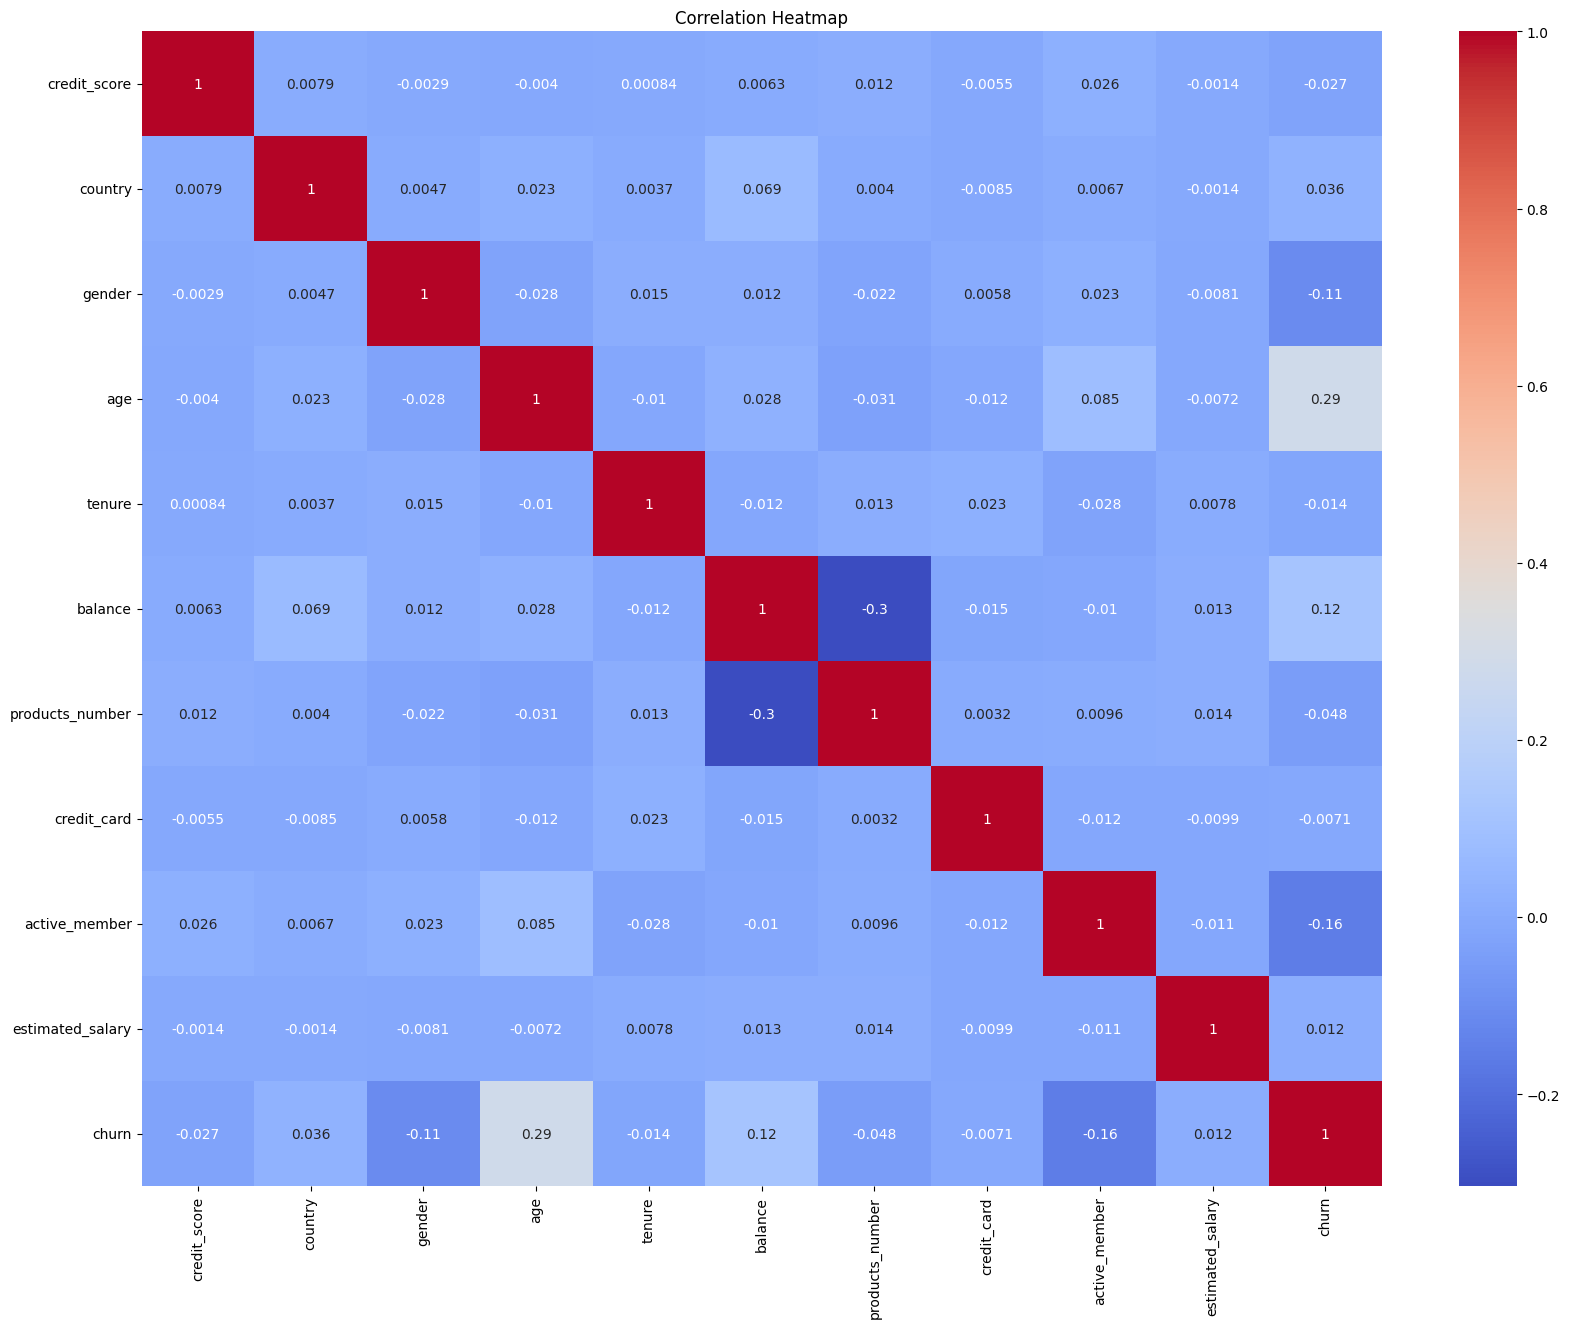

In [35]:
# Visualisasi Pearson Correlation
correlation_matrix = data.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Berdasarkan visualisasi heatmap pada Pearson Correlation diatas menunjukkan bahwa feature kolom `balance` dan `age` memiliki nilai korelasi yang positif dengan kolom data `churn` sebagai variabel data target. Sedangkan untuk kolom yang lain ada beberapa kolom yang memiliki nilai korelasi negatif.

In [36]:
# Visualisasi boxplot pada kolom products number dan balance
fig = px.box(data, x = 'products_number', y = 'balance', color = 'churn', title = '')
fig.show()

In [37]:
# Visualisasi scatterplot pada data kolom balance dan country
fig = px.scatter(data, x = 'balance', y = 'country', color = 'churn', title = 'Persebaran Pola Saldo Pelanggan Berdasarkan Negara')
fig.show()

### **Feature Selection**

In [38]:
# Lakukan pemilihan data kolom fitur dan target
X = data.drop(['churn'], axis = 1)
y = data['churn']

In [40]:
X.shape

(10000, 10)

In [41]:
y.shape

(10000,)

In [42]:
# Pisahkan dataset dengan rasio 80:20 (80% Training dan 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)
print('Data Training : ', X_train.shape, y_train.shape)
print('Data Testing  : ', X_test.shape, y_test.shape)

Data Training :  (8000, 10) (8000,)
Data Testing  :  (2000, 10) (2000,)


### **Feature Engineering**

In [43]:
# Lakukan perubahan data dengan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
X_train

array([[ 1.058568  , -0.90593285,  0.90750738, ...,  0.64104192,
        -1.030206  ,  1.04209111],
       [ 0.91362605,  0.30016846,  0.90750738, ...,  0.64104192,
        -1.030206  , -0.62355425],
       [ 1.07927399,  0.30016846, -1.10191942, ...,  0.64104192,
         0.97067965,  0.308132  ],
       ...,
       [ 0.16821031, -0.90593285, -1.10191942, ...,  0.64104192,
         0.97067965, -0.5580929 ],
       [ 0.37527024,  1.50626978,  0.90750738, ...,  0.64104192,
        -1.030206  , -1.35149573],
       [ 1.56586482,  1.50626978,  0.90750738, ..., -1.55996038,
         0.97067965, -1.02692739]])

In [45]:
X_test

array([[-0.68073539, -0.90593285,  0.90750738, ...,  0.64104192,
        -1.030206  , -0.09501439],
       [-1.30191518,  0.30016846,  0.90750738, ..., -1.55996038,
        -1.030206  , -0.77894867],
       [-0.97061929,  1.50626978, -1.10191942, ..., -1.55996038,
         0.97067965,  0.09946846],
       ...,
       [-1.39509214,  0.30016846, -1.10191942, ..., -1.55996038,
        -1.030206  ,  0.87009151],
       [ 0.39597623, -0.90593285,  0.90750738, ..., -1.55996038,
        -1.030206  , -1.47934859],
       [ 1.02750901, -0.90593285,  0.90750738, ...,  0.64104192,
        -1.030206  , -0.49531767]])

## **Modelling**

### **Logistic Regression**

In [46]:
# Pemodelan dengan algoritma Logistic Regression
lr_clf = LogisticRegression(penalty = 'l2', C = 0.01)
lr_clf.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [48]:
lr_pred = lr_clf.predict(X_test)
lr_pred

array([0, 0, 0, ..., 1, 0, 0])

### **Random Forest**

In [49]:
# Pemodelan dengan algoritma Random Forest
rf_clf = RandomForestClassifier(n_estimators = 100,
                                criterion = 'gini',
                                min_samples_split = 2,
                                min_samples_leaf = 1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
rf_pred = rf_clf.predict(X_test)
rf_pred

array([0, 0, 0, ..., 1, 0, 0])

## **Evaluation**

### **Classification Report**

In [51]:
# Evaluasi dengan Classification Report model Logistic Regression
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1593
           1       0.62      0.12      0.19       407

    accuracy                           0.81      2000
   macro avg       0.72      0.55      0.54      2000
weighted avg       0.77      0.81      0.75      2000



In [52]:
# Evaluasi dengan Classification Report model Random Forest
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



### **Confusion Matrix**

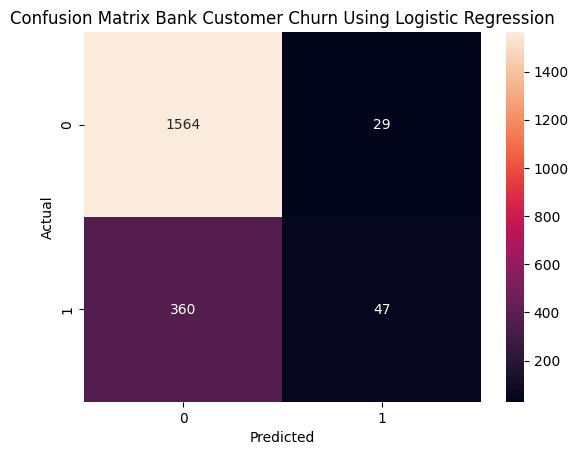

In [54]:
# Evaluasi dengan Confusion Matrix pada model Logistic Regression
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix Bank Customer Churn Using Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

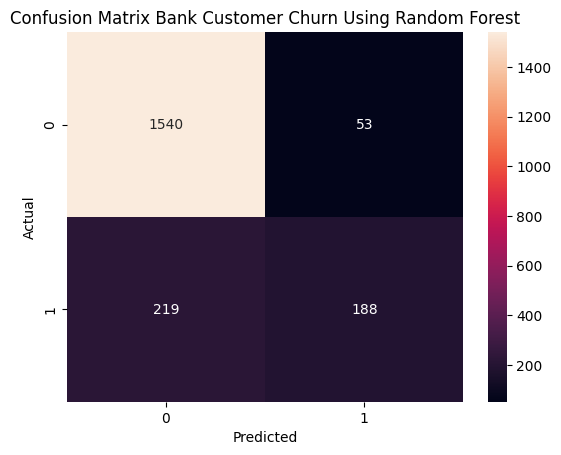

In [55]:
# Evaluasi dengan Confusion Matrix pada model Random Forest
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix Bank Customer Churn Using Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **ROC-AUC Curve**

Logistic Regression ROC AUC: 0.7713


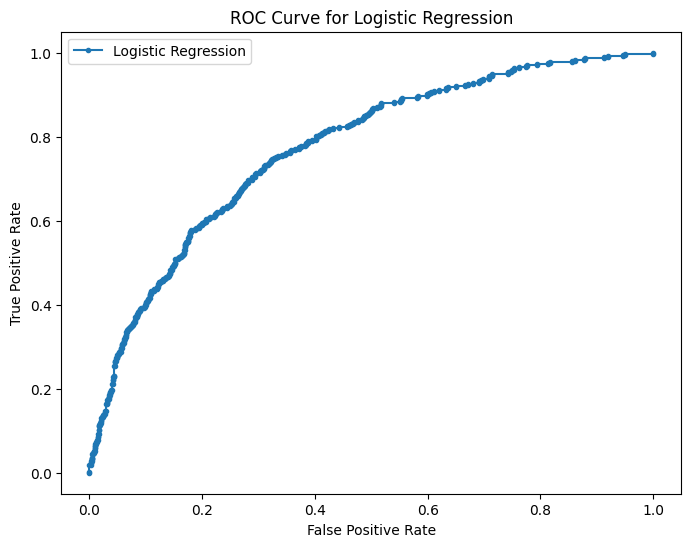

In [57]:
# Evaluasi ROC-AUC pada model Logistic Regression
lr_probs = lr_clf.predict_proba(X_test)[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print(f'Logistic Regression ROC AUC: {lr_auc:.4f}')

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

Random Forest ROC AUC: 0.7713


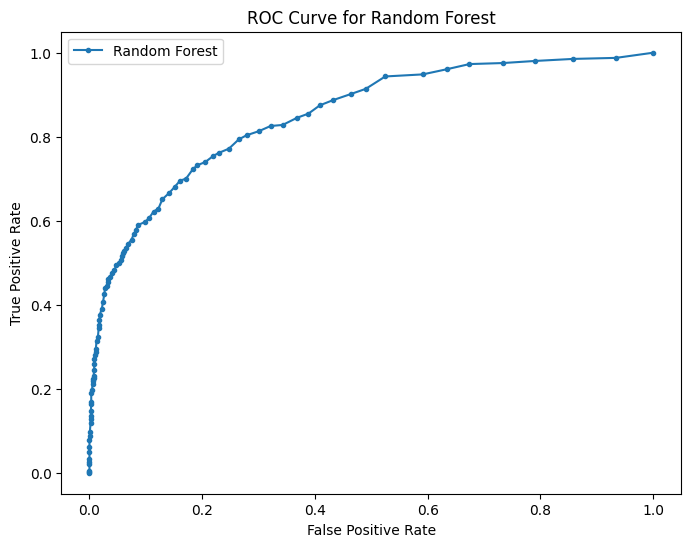

In [58]:
# Evaluasi ROC-AUC pada model Random Forest
rf_probs = rf_clf.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print(f'Random Forest ROC AUC: {lr_auc:.4f}')

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

### **Feature Importance**

In [60]:
# Cek fitur terpenting yang menjadi acuan pada data target
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_clf.feature_importances_})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)
feature_importance

,Feature,Importance
3,age,0.238632
9,estimated_salary,0.148244
0,credit_score,0.145609
5,balance,0.140542
6,products_number,0.128943
4,tenure,0.080018
8,active_member,0.041801
1,country,0.038270
7,credit_card,0.019265
2,gender,0.018675


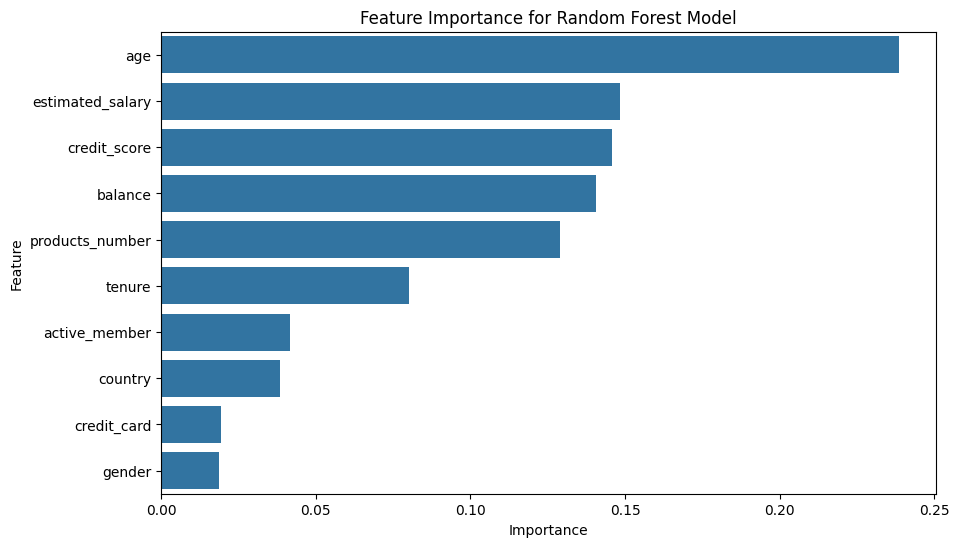

In [61]:
# Visualisasi feature importance pada model Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [63]:
# Cek fitur terpenting yang menjadi acuan pada data target
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': lr_clf.coef_[0]})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)
feature_importance

,Feature,Importance
3,age,0.670585
5,balance,0.282425
1,country,0.070445
9,estimated_salary,0.045381
4,tenure,-0.014039
7,credit_card,-0.023762
6,products_number,-0.036485
0,credit_score,-0.078601
2,gender,-0.243072
8,active_member,-0.459424


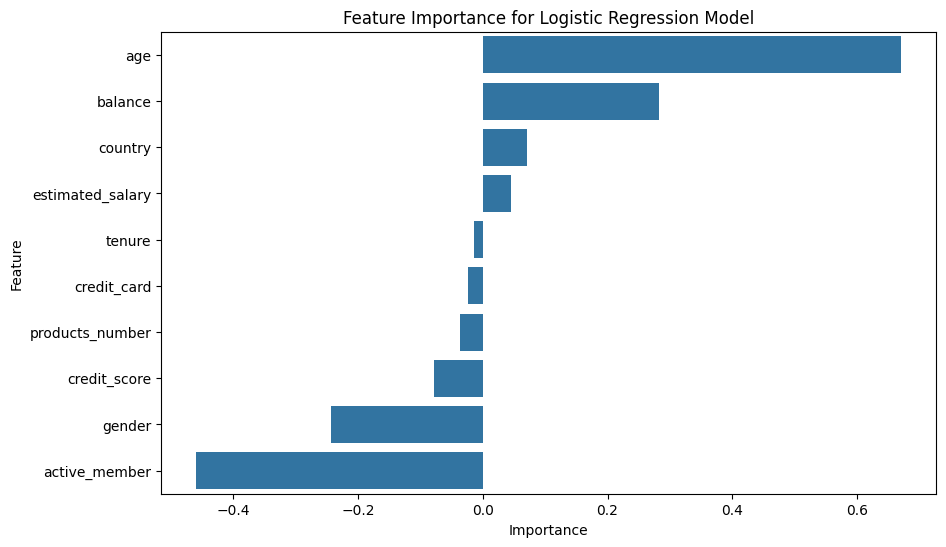

In [64]:
# Visualisasi feature importance pada model Logistic Regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Logistic Regression Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()